<a href="https://colab.research.google.com/github/belanatal/PosPUCRio/blob/main/MVPSprintIIb_IsabelaNatal-Entrega.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PUC Rio: Pós Graduação em Ciência de Dados e Analytics**

**MVP Sprint II: Machine Learning & Analytics (40530010056_20230_01)**
**- Parte b**

Aluna: Isabela Fernanda Natal Batista Abreu Gomes

Julho/2023

## Seção I: Introdução
**Classificador de imagens multiclasse - Paisagens Naturais**

**Contexto:** O presente trabalho tem como objetivo criar um modelo de visão computacional baseado em Aprendizado de Máquina Profundo que seja capaz de classificar uma imagem segundo uma das 6 seguintes categorias de paisagens: Prédio; Floresta; Montanha; Geleira; Rua; Mar. Os dados/imagens foram baixados da plataforma Kaggle (Para mais informações "Scene Classification": https://www.kaggle.com/datasets/nitishabharathi/scene-classification).

**Estrutura:** O notebook encontra-se dividido da seguinte forma:

- Importação das bibliotecas
- Acesso e tratamento dos dados que serão a entrada do modelo de deep learning
- Configuração do modelo de deep learning usando uma rede neural convolucional com Keras
- Treinamento do modelo de deep learning
- Execução do modelo de deep learning treinado
- Avaliação do modelo de deep learning
- Exportação do modelo de deep learning
- Teste do modelo exportado
- Conclusão

### Importando as bibliotecas necessárias para executar o notebook
(Serão utilizadas as bibliotecas pandas e numpy, para a manipulação dos dados; matplotlib, para geração de gráficos; os, para manipulação de pastas e diretórios e bibliotecas voltadas para Machine e Deep Learning, tais como Keras, Tensor Flow e Scikit-Learn)

In [ ]:
!pip install tensorflow==2.13
!pip install keras

In [ ]:
# Primeiro bloco: Importação das bibliotecas e módulos
# Configuração para não exibir os warnings
import warnings
warnings.filterwarnings("ignore")
#
import os
import cv2 # Visão computacional para análise em imagens
import numpy as np
import pandas as pd
import tensorflow as tf
import sklearn.metrics as skm
from tensorflow import keras
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
from IPython.display import Image, display
from datetime import datetime
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
import itertools
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
#
#Para utilizar o upload e download de arquivos no colab:
from google.colab import drive
from google.colab import files
import gdown
from zipfile import ZipFile

### Acessando os dados que serão entrada do modelo - via Google Drive

In [ ]:
# Baixando a pasta compactada para o notebook
folder_path = "https://drive.usercontent.google.com/download?id=11PLDr83xGsG-lxZMxoFadgEy-iR3q4Qq&export=download&authuser=0&confirm=t&uuid=35044ed5-0d7c-4289-b486-6bf5dea852d0&at=AC2mKKQLNA-0NZzF6s1wgeK530LY:1690032546075"
output = "scene-classification.zip"
gdown.download(folder_path, output)

In [ ]:
with ZipFile('scene-classification.zip', 'r') as zip_object:
  zip_object.extractall()

In [ ]:
if os.path.exists('/content/train-scene classification'):
  os.rename('../content/train-scene classification','../content/scene')

In [ ]:
if os.path.exists('/content/scene/train'):
  os.rename('../content/scene/train','../content/scene/Imagens')

In [ ]:
os.remove('../content/scene-classification.zip')

In [ ]:
com_label=pd.read_csv('../content/scene/train.csv',sep=',')
sem_label=pd.read_csv('../content/test_WyRytb0.csv',sep=',')

In [ ]:
com_label.head()

In [ ]:
# Substituindo as categorias numéricas por categorias textuais
# (Lembrando que: 0:"Edificio", 1:"Floresta", 2:"Geleira",3:"Montanha",4:"Mar",5:"Rua")
com_label['label'] = com_label['label'].replace({0:"Edificio", 1:"Floresta", 2:"Geleira",3:"Montanha",4:"Mar",5:"Rua"})

In [ ]:
# Reavaliando as primeiras linhas para conferir se os valores da coluna label foram alterados
com_label.head()

In [ ]:
# Verificando as dimensões dos DataFrames com as indicações das imagens correspondentes aos conjuntos com label e sem label
print(com_label.shape,sem_label.shape)

In [ ]:
# Verificando se os DataFrames contêm dados nulos
# Verify if the dataframe don't have NaN or null values
check_for_nan_comlabel = com_label.isnull().values.any()
check_for_nan_semlabel = sem_label.isnull().values.any()

print(check_for_nan_comlabel)
print(check_for_nan_semlabel)

In [ ]:
# Criando a lista para armazenar os dados e selecionar a pasta da imagem a ser carregada
arquivos_com_label = []
labels = []
arquivos_teste = []
arquivos_teste_prediction = []
imagePath = "../content/scene/Imagens/"

In [ ]:
# Mantendo na pasta de imagens apenas aquelas que contêm label associado
for i in sem_label.index:
    nameOfFile = sem_label['image_name'][i]
    if os.path.exists(imagePath+nameOfFile):
        os.remove(imagePath+nameOfFile)

In [ ]:
images=os.listdir(imagePath)

heights, widths,filesize = [], [], []

# Loop que percorre cada uma das imagens extraídas
for fname in images:

    img_shape = mpimg.imread(imagePath+fname).shape
    heights.append(img_shape[0])
    widths.append(img_shape[1])
    filesize.append(os.path.getsize(imagePath+fname))

# Criação do dataset
df = pd.DataFrame({'image_name': images, 'height': heights,
                         'width': widths, 'filesize': filesize})
print(len(df)) # para confirmação de que apenas as imagens com label (17034) foram mantidas na pasta

In [ ]:
df.head()

In [ ]:
# Mesclando ao dataframe df a coluna com o label (categoria) das imagens:

df=pd.merge(df,com_label,how="left")
df.head()

In [ ]:
fig = plt.gcf()
fig.set_size_inches(3*4, 3*4)

# Visualizando 12 imagens
for i in range(12):

    sample = np.random.choice(images)
    for j in range(0,len(df)):
      if df['image_name'][j]==sample:
        titulo=df['label'][j]
        img_path =imagePath+sample
        sp = plt.subplot(3, 4, i + 1)
        sp.axis('Off')
        img = mpimg.imread(img_path)
        plt.imshow(img)
        plt.title(titulo+"-"+df['image_name'][j])

plt.show()

## Seção II: Passos iniciais para tratamento dos dados

### Acessando e tratando os dados que serão a entrada do modelo de deep learning

In [ ]:
# Definindo o tamanho do batch e dimensão das imagens e a quantidade de épocas
batch_size = 32
img_height = 150
img_width = 150
num_classes = 6
epochs = 10 # Para o trabalho, salvaremos o caso com 10 épocas, para reduzir o tempo computacional
# Um resumo das métricas de avaliação do modelo para 2 e 40 épocas encontra-se na seção de Avaliação do Modelo

In [ ]:
# Associando as imagens ao dataset com label
for i in com_label.index:
    nameOfFile = com_label['image_name'][i]
    if os.path.exists(imagePath+nameOfFile):
        image = mpimg.imread(imagePath+nameOfFile)
        if (len(image.shape)!=3): # Verify if the image is correct
            print("A imagem N°",i,' : ',nameOfFile," não está adequada")
        else :
            image = cv2.resize(image,(img_width,img_height)) # conjunto de arquivos com label sem imagens "expúrias"
            arquivos_com_label.append(image)
            labels.append(com_label['label'][i])
print(len(arquivos_com_label))
print(len(labels))

In [ ]:
labels[0]

In [ ]:
# Convertendo o dataset de treino em array
arquivos_com_label = np.array(arquivos_com_label)
labels = np.array(labels)
print(arquivos_com_label.shape,labels.shape)

## Seção III: Configuração do Modelo de Deep Learning

### Configuração do Modelo usando uma Rede Neural Convolucional (CNN)

Utilizando a biblioteca Keras, será especificada uma camada convolucional 2D com 64 filtros (depois 128, 256 e 512) e função de ativação do tipo ReLU. Na sequência é adicionada uma camada softmax com o mesmo tipo de função de ativação.

In [ ]:
model = keras.models.Sequential([
    keras.layers.Conv2D(64, 3, activation='relu', padding= "same", input_shape=(img_height,img_width,3)),
    keras.layers.MaxPooling2D((2)),
    keras.layers.Conv2D(128, 3, activation='relu', padding= "same"),
    keras.layers.Conv2D(128, 3, activation='relu', padding= "same"),
    keras.layers.MaxPooling2D((2)),
    keras.layers.Conv2D(256, 3, activation='relu', padding= "same"),
    keras.layers.Conv2D(256, 3, activation='relu', padding= "same"),
    keras.layers.Conv2D(256, 3, activation='relu', padding= "same"),
    keras.layers.MaxPooling2D((2)),
    keras.layers.Conv2D(512, 3, activation='relu', padding= "same"),
    keras.layers.Conv2D(512, 3, activation='relu', padding= "same"),
    keras.layers.Conv2D(512, 3, activation='relu', padding= "same"),
    keras.layers.MaxPooling2D((2)),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(num_classes, activation='softmax')
])

In [ ]:
# Resumindo o modelo que será utilizado
model.summary()

### Treinamento do modelo de deep learning

Vamos considerar o modelo Adam para otimização. Como métrica para avaliação do modelo, será usado o critério de acurácia. Além disso, por se tratar de um problema de classificação com mais de 2 categorias (6, neste problema), a perda considerada será do tipo entropia cruzada.

In [ ]:
model.compile(optimizer=Adam(learning_rate=1e-4), loss='categorical_crossentropy', metrics=['accuracy'])

### Separação das imagens com labels fornecidos em treino, teste e validação
As imagens com categorias fornecidas conforme DataFrame com label serão divididas em treino, teste e, em seguida, o subconjunto de treino será novamente dividido, entre treino e validação

In [ ]:
# Separação do dataset com os labels em treino e teste (20% para teste)
X_train, X_test, y_train, y_test = train_test_split(df['image_name'], df['label'], test_size=0.2 ,random_state=42 , shuffle=True)

# Redivisão do dataset de treino em treino (90%) e validação (10%)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42 , shuffle=True)

In [ ]:
# Avaliando os comprimentos dos datasets de treino e validação
print(X_train.shape,y_train.shape,X_test.shape,y_test.shape,X_val.shape,y_val.shape)
print(X_train.dtype,y_train.dtype,X_test.dtype,y_test.dtype, X_val.dtype,y_val.dtype)

In [ ]:
# Confirmando que os datasets possuem quantidades representativas de cada uma das seis categorias
unique, counts = np.unique(y_train, return_counts=True)
print('Distribuição quantitativa dos labels no dataset de treino:')
print(dict(zip(unique, counts)))
print('---------------------------------------------------------------------------')
unique, counts = np.unique(y_test, return_counts=True)
print('Distribuição quantitativa dos labels no dataset de teste:')
print(dict(zip(unique, counts)))
print('---------------------------------------------------------------------------')
unique, counts = np.unique(y_val, return_counts=True)
print('Distribuição quantitativa dos labels no dataset de validação:')
print(dict(zip(unique, counts)))

Após a divisão, os datasets de treino, teste e validação ficaram com distribuições significativas e balanceadas de todas as 6 categorias de imagem.

Nas etapas a seguir, serão construídos os dataframes correspondentes aos conjuntos de treino, teste e validação, todos contendo uma coluna com o nome da imagem (exemplo:1000.jpg) e uma coluna com o label (categoria de paisagem correspondente).

In [ ]:
# Criando os dataframes correspondentes a X e y teste, treino e validação:
dfX_train=pd.DataFrame(X_train)
dfX_test=pd.DataFrame(X_test)
dfX_val=pd.DataFrame(X_val)

dfy_train=pd.DataFrame(y_train)
dfy_test=pd.DataFrame(y_test)
dfy_val=pd.DataFrame(y_val)

In [ ]:
dfX_train.head()

In [ ]:
dfy_train.head()

In [ ]:
# Resetando o índice original
dfX_train=dfX_train.reset_index()
dfX_test=dfX_test.reset_index()
dfX_val=dfX_val.reset_index()

dfy_train=dfy_train.reset_index()
dfy_test=dfy_test.reset_index()
dfy_val=dfy_val.reset_index()

df_train=pd.merge(dfX_train,dfy_train,how="left")
df_test=pd.merge(dfX_test,dfy_test,how="left")
df_val=pd.merge(dfX_val,dfy_val,how="left")

In [ ]:
df_train.head()

In [ ]:
# Deletando a coluna index com os índices originais
df_train=df_train.drop(columns=["index"])
df_test=df_test.drop(columns=["index"])
df_val=df_val.drop(columns=["index"])

In [ ]:
df_train.head()

In [ ]:
df_test.head(20)

In [ ]:
df_val.head(20)

In [ ]:
ntrain = X_train.shape[0]
nval = X_val.shape[0]
ntest = X_test.shape[0]

### Preparação dos dados
Será utilizada a classe "ImageDataGenerator", do TensorFlow, destinada a aumentar e pré-processar dados de imagem em tarefas de Aprendizado Profundo.

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

val_datagen = ImageDataGenerator(rescale=1./255)

test_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
train_generator=train_datagen.flow_from_dataframe(
    df_train,imagePath,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',
    x_col='image_name',
    y_col='label')

val_generator=test_datagen.flow_from_dataframe(
    df_val,imagePath,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',
    x_col='image_name',
    y_col='label')

test_generator=test_datagen.flow_from_dataframe(
    df_test ,imagePath,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',
    x_col='image_name',
    y_col='label')

No presente trabalho, será usado o método flow_from_dataframe() para gerar imagens aumentadas a partir de um dataframe, que aponta para as imagens originais. O método recebe parâmetros como o dataframe, o diretório com as imagens, o tamanho do lote (batch size) e o modo de classe (neste caso, categorical, em função da quantidade de classes), entre outros.

Importante ressaltar que o pré-processamento do teste não envolve o aumento de dados.

In [ ]:
history = model.fit(train_generator, steps_per_epoch=ntrain//batch_size,epochs=epochs, validation_data=val_generator)

### Avaliação da Entropia Cruzada e da Acurácia pelo número de épocas
A entropia cruzada mede a diferença entre duas distribuições de probabilidade (verdadeira e falsa) sobre um mesmo conjunto de dados.

A acurácia é a proximidade de um resultado predito com o seu valor de referência real.

Conforme se aumenta o número de épocas, espera-se que o parâmetro loss diminua (para o dataset de treino e também para o de validação) e que a acurácia aumente.

Além disso, é possível inferir sobre under ou overfitting do modelo a depender dos resultados para os conjuntos de treino e validação.

In [ ]:
plt.plot(history.history['loss'], label="Training Loss")
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Nº de épocas')
plt.ylabel('Loss')
plt.title('Loss x Época')
plt.legend()
plt.show()

plt.plot(history.history['accuracy'], label="Training Accuracy")
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Nº de épocas')
plt.ylabel('Acurácia')
plt.title('Acurácia x Época')
plt.legend()
plt.show()


> Como podemos observar, o modelo aplicado ao dataset de validação apresenta maior acurácia e menor entropia cruzada quando comparado ao modelo em treino. A princípio, o modelo está bem dimensionado, sem overfitting, e pode ser aplicado ao subconjunto de teste.



## Seção IV: Execução do Modelo de Deep Learning
Nesta seção, o modelo treinado será aplicado em cada uma das imagens do dataset de teste, indicando a qual das 6 classes  (Edificio; Floresta; Montanha; Geleira; Rua; Mar) pertence.

In [ ]:
parent_dir = imagePath
limiteplot=100 # quantidade máxima de imagens a serem plotadas na aplicação do modelo ao dataset de teste
count_images = 0
class_names = ['Edificio',
               'Floresta',
               'Geleira',
               'Mar',
               'Montanha',
               'Rua']
y_pred = [] # para armazenar as categorias preditas das imagens do dataset de teste
y_true = [] # para armazenas as categorias reais das imagens do dataset de teste

In [ ]:
# Reimportando a biblioteca images do Keras pois, durante os testes com o notebook, esta célula apresentava erro ao não importar novamente
from keras.preprocessing import image

# Aplicando o modelo treinado a todos os arquivos indicados no DataFrame de teste
for subdir, dirs, files in os.walk(parent_dir):
  for file in files:
    for i in range(len(df_test)):
      if file==df_test['image_name'][i]:
        count_images+=1
        label=df_test['label'][i]
        y_true.append(label)
        img_path=os.path.join(imagePath,file)

        img=image.load_img(img_path, target_size=(img_height, img_width))
        x = image.img_to_array(img)
        x = np.expand_dims(x, axis=0)
        x = x.astype('float32') / 255.0

        # Previsão
        prediction = model.predict(x)
        # Printando as saídas do modelo
        predicted_class = np.argmax(prediction[0])
        probability = prediction[0][predicted_class]
        y_pred.append(class_names[predicted_class])

        if count_images<limiteplot+1: # para reduzir a quantidade de imagens plotadas e deixar mais leve o notebook executado

          display(Image(filename=img_path, width=300))
          print("Arquivo:", file)
          print("Categoria real:", label)
          print("Categoria prevista:", class_names[predicted_class])
          print("Probabilidade:", probability)
          print("\n")

In [ ]:
# Confirmando as dimensões dos vetores com os labels do conjunto de testes reais e preditos
print('Dimensão do vetor com as categorias preditas para o conjunto de teste')
print(len(y_pred))
print(' ')
print('Dimensão do vetor com as categorias reais para o conjunto de teste')
print(len(y_true))

## Seção V: Avaliação do Modelo



Além da acurácia, o modelo será avaliado de acordo com as seguintes métricas:

***Precisão:*** Mede a proporção de verdadeiros positivos em relação ao total de previsões positivas feitas pelo modelo. É útil quando o foco está na minimização de falsos positivos.

***Recall:*** Mede a proporção de verdadeiros positivos em relação ao total de amostras verdadeiramente positivas na base de dados. É útil quando o foco está na minimização de falsos negativos.

***F1 Score:*** Combina precisão e recall em uma única pontuação. É útil para equilibrar a importância de precisão e recall, especialmente quando as classes estão desbalanceadas.

In [ ]:
# Calculando as métricas para avaliação do modelo
acuracia = skm.accuracy_score(y_true, y_pred)
precisao = skm.precision_score(y_true, y_pred, average='weighted')
recall = skm.recall_score(y_true, y_pred, average='weighted')
f1score = skm.f1_score(y_true, y_pred, average='weighted')

print("Acurácia: ", acuracia)
print("Precisão: ", precisao)
print("Recall: ", recall)
print("F-Score: ", f1score)

In [ ]:
# Avaliando as métricas para cada classe
print(classification_report(y_true, y_pred, target_names=test_generator.class_indices.keys()))

Para o modelo treinado com 10 épocas, a categoria Geleira foi a que apresentou menor recall e Montanha, a menor precisão. Essas duas métricas estão relacionadas entre si, uma vez que a maior confusão do modelo está em classificar imagens com label real igual a Geleira como se fossem Montanha.

### Matriz de Confusão
A seguir, será avaliada a resposta do método com a quantidade especificada de épocas. Espera-se que, quanto maior a quantidade de épocas, seja possível alcançar melhores resultados com o modelo.

In [ ]:
cnf_matrix = confusion_matrix(y_true, y_pred, labels=['Edificio','Floresta','Geleira','Mar','Montanha','Rua'])
np.set_printoptions(precision=2)

In [ ]:
# Matriz de Confusão
plt.figure(figsize=(8,6))
plt.title('Label Predito (eixo x) vs Label Real (eixo y)')
plt.ylabel('Label real')
plt.xlabel('Label predito')

sns.heatmap(cnf_matrix , annot=True,
            fmt = ".0f", cmap='Blues',
            linewidths=.5,
            xticklabels=['Edificio','Floresta','Geleira','Mar','Montanha','Rua'],
            yticklabels=['Edificio','Floresta','Geleira','Mar','Montanha','Rua'],
            vmin =0, vmax = 600)

In [ ]:
unique, counts = np.unique(y_test, return_counts=True)
print('Distribuição quantitativa dos labels no dataset de teste:')
print(dict(zip(unique, counts)))

### Resumo do modelo com 2 épocas

A matriz de confusão abaixo foi plotada para 2 épocas. Ainda assim, percebe-se que o modelo conseguiu prever com bastante precisão as imagens do dataset de teste classificadas como Floresta (518 das 551) e das classificadas como Montanha (515 das 623). Entretanto, o modelo com 2 épocas não se mostrou satisfatório para imagens pertencentes à categoria "Mar". À bem da verdade, a maioria esmagadora das imagens de mar foram classificadas como montanha ou geleira. E muitas imagens de geleira também foram falsamente categorizadas como montanha. Essas características são quantificadas quando verificamos a baixa precisão associada à classe montanha e ao baixíssimo recall da classe mar.

Embora as métricas globais girem em torno dos 60%, fica claro como o modelo com 2 épocas está mal dimensionado principalmente para imagens de mar.

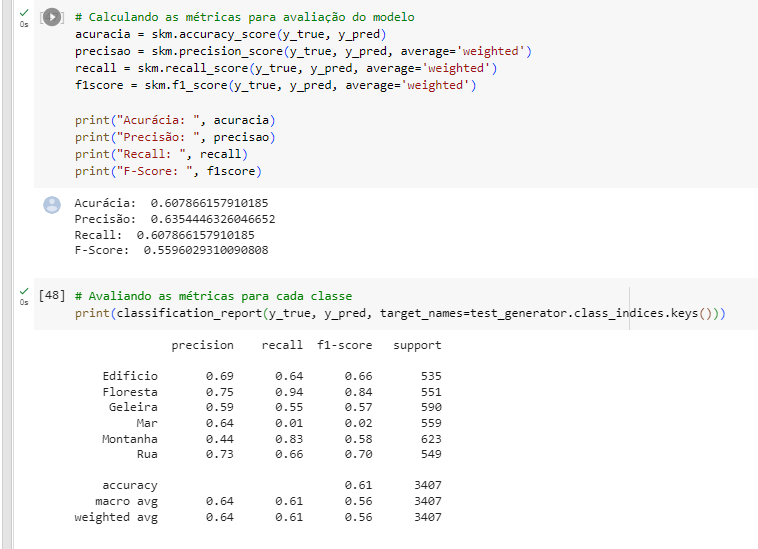

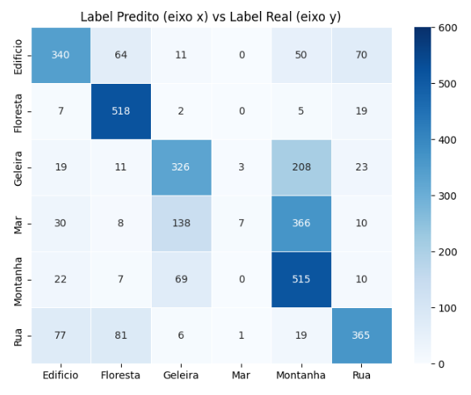

### Resumo do modelo com 40 épocas
Ao aumentarmos a quantidade de épocas para 40, o modelo apresenta, de forma global, valores próximos a 88-89% para todas as métricas avaliadas. Ao avaliarmos a matriz de confusão, constata-se uma redução considerável nos erros "mais frequentes" observados para quantidades menores de épocas (isto é: Rua x Edifício e Geleira x Mar e Montanha). Um possível aperfeiçoamento do modelo, entretanto, poderia ser no caminho de reduzir ainda mais a confusão Edifício x Rua e Geleira x Montanha. De um modo geral, apenas aumentando a quantidade de épocas o método se mostrou expressivamente melhor e bom ou muito bom para todas as categorias de imagem.

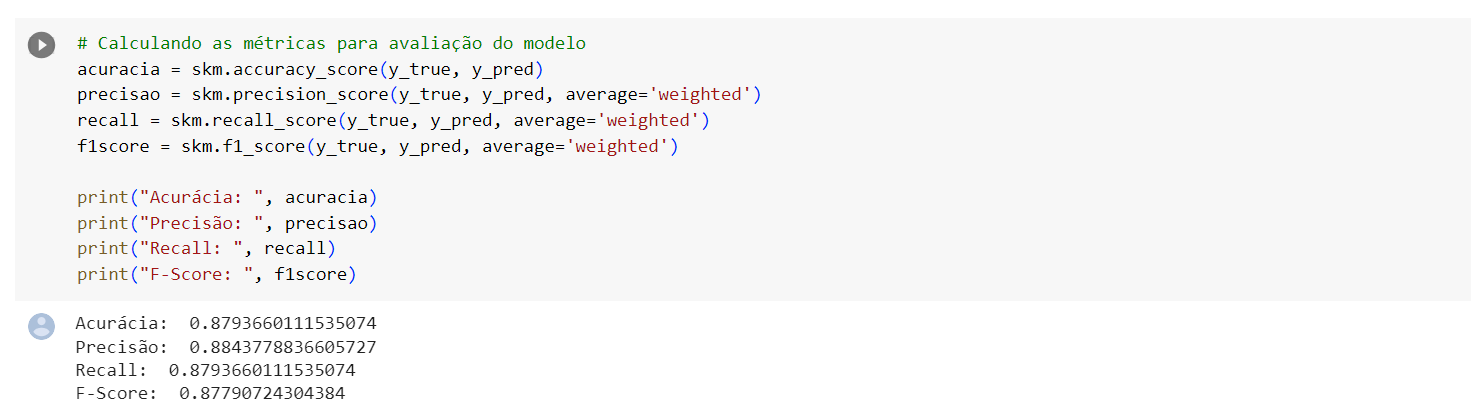

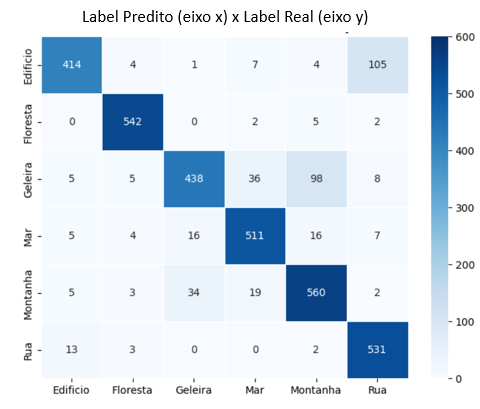

### Exportação do Modelo para uso posterior
Salvando o modelo de deep learning que foi treinado, para que possa ser aplicado em casos futuros

In [ ]:
# Definindo os caminhos de diretorios para o modelo exportado
treinamento_modelos_dir='/content/scene/trained_models'
if not os.path.exists(treinamento_modelos_dir):
  os.makedirs(treinamento_modelos_dir)

In [ ]:
# Vamos salvar o modelo treinado para aplicação futura

# obtendo a data e hora atual
now = datetime.now()

# Definição do formato
format = '%Y-%m-%dT%H%M'

# Converter a data e hora em uma string com o formato especificado
formatted_datetime = now.strftime(format)

path_model = treinamento_modelos_dir

name_model = 'trained_model_' + formatted_datetime + '.h5'

# salvando o modelo
model.save("%s/%s" % (path_model, name_model))
print("Modelo salvo com o nome: ", name_model)

### Teste do modelo exportado
Carregando o modelo salvo e testando para acompanhar cada as imagens de teste

In [ ]:
loaded_model = keras.models.load_model("%s/%s" % (path_model, name_model))
print("Modelo %s carregado com sucesso" % (name_model))

In [ ]:
# Reimportando a biblioteca images do Keras pois, durante os testes com o notebook, esta célula apresentava erro ao não importar novamente

from keras.preprocessing import image
for subdir, dirs, files in os.walk(parent_dir):
  for file in files:
    for i in range(len(df_test)):
      if file==df_test['image_name'][i]:
        count_images+=1
        label=df_test['label'][i]
        y_true.append(label)
        img_path=os.path.join(imagePath,file)

        img=image.load_img(img_path, target_size=(img_height, img_width))
        x = image.img_to_array(img)
        x = np.expand_dims(x, axis=0)
        x = x.astype('float32') / 255.0

        # Previsão
        prediction = loaded_model.predict(x)
        # Printando as saídas do modelo
        predicted_class = np.argmax(prediction[0])
        probability = prediction[0][predicted_class]
        y_pred.append(class_names[predicted_class])

        if count_images<3*limiteplot+1: # para reduzir a quantidade de imagens plotadas e deixar mais leve o notebook executado
          display(Image(filename=img_path, width=300))
          print("Arquivo:", file)
          print("Categoria real:", label)
          print("Categoria prevista:", class_names[predicted_class])
          print("Probabilidade:", probability)
          print("\n")

## Seção VI: Conclusão

O presente trabalho teve como objetivo aplicar um modelo de Deep learning para a classificação de imagens de paisagem do tipo Edifício, Rua, Mar, Montanha, Geleira e Floresta.

A partir de um conjunto de mais de 17.000 imagens. Houve um trabalho inicial de curadoria das imagens e preparação/divisão das mesmas entre treino, teste e validação e criada uma Rede Neural Convolucional, baseada nos subconjuntos de treino e validação, depois aplicada ao conjunto de testes (com avaliação de métricas) e exportação do método para aplicação futura, se pertinente.

Pelas avaliações realizadas, o modelo não se mostrou com overfitting e, mesmo para 10 épocas (uma quantidade relativamente baixa), a acurácia global foi superior a 80%. As maiores dificuldades do modelo foram relacionadas à diferenciar Edifício de Rua e Geleira e Mar de Montanha (o que pode ser intuitivamente explicado, talvez, pela similaridade de cores/formas e mesmo pela coexistência de mais de uma classe na mesma imagem. Por exemplo: existem imagens com label real igual a Edifício, mas que também contêm um trecho de rua em sua área gráfica e isso pode gerar dificuldade ao modelo para entender o padrão de classificação como uma categoria em detrimento da outra).

Conforme apresentado, a performance (em termos das métricas de acurácia, precisão, recall e F-Score) aumentou de forma significativa de 2 para 10 décadas e de modo mais atenuado de 10 para 40 épocas (acurácia próxima dos 88%, valor satisfatório para aplicações usuais). Com isto, recomenda-se avaliar o tradeoff entre tempo de execução (de cerca de 2,5 minutos a mais por época) e o ganho de acurácia do modelo, lembrando que, ao considerarmos os resultados para cada categoria, o método para 40 épocas mostrou-se muito melhor (especialmente para Geleira, Mar e Montanha).

Uma sugestão de trabalho futuro é tentar aperfeiçoar o modelo de modo a reduzir a quantidade de imagens de Geleira classificadas como Montanha e de Edifícios categorizados pelo método como Rua.